# 9-1. 프로젝트 1 : 선형회귀, 당뇨병 수치 예측 모델

In [36]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split


## (1) data 가져오기

In [37]:
diabetes = load_diabetes()

In [38]:
# data와 target 받아오기

# 데이터 탐색용 코드
x_data = diabetes.data
y_data = diabetes.target

# 과제 제출용 코드
df_X = diabetes.data
df_y = diabetes.target

In [39]:
print(x_data.shape)
print(y_data.shape)

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)
(442, 10)
(442,)


In [40]:
# 데이터 탐색용

for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [41]:
print('<x_data[0]> : ',x_data[0])
print()
print('<y_data[0]> : ',y_data[0])

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<y_data[0]> :  151.0


In [42]:
class MultiLinear:
  def __init__(self,learning_rate=0.001):
    self.w=None #모델의 weight 벡터 self.w=(w_1,w_2)
    self.b=None #모델의 bias
    self.lr=learning_rate #모델의 학습률
    self.losses=[] #매 에포크마다 손실을 저장하기 위한 리스트
    self.weight_history=[] #매 에포크마다 계산된 weight를 저장하기 위한 리스트
    self.bias_history=[] #매 에포크마다 계산된 bias를 저장하기 위한 리스트

  def forward(self,x):
    y_pred=np.sum(x*self.w)+self.b #np.sum함수는 인자로 받은 numpy배열의 모든 원소의 합을 return합니다.
    return y_pred

  def loss(self,x,y):
    y_pred=self.forward(x)
    return (y_pred-y)**2

  def gradient(self,x,y):
    y_pred=self.forward(x)
    w_grad=2*x*(y_pred-y)
    b_grad=2*(y_pred-y)

    return w_grad,b_grad

  def fit(self,x_data,y_data,epochs=20):
    self.w=np.ones(x_data.shape[1]) #모델의 weight들을 전부 1로 초기화
    self.b=0 #모델의 bias를 0으로 초기화
    for epoch in range(epochs):
      l=0 #계산할 손실값
      w_grad=np.zeros(x_data.shape[1]) #weight의 기울기를 누적할 numpy배열
      b_grad=0  #bias의 기울기를 누적할 변수

      for x,y in zip(x_data,y_data):
        l+=self.loss(x,y)
        w_i,b_i=self.gradient(x,y)

        w_grad+=w_i #weight누적
        b_grad+=b_i #bias누적

      self.w-=self.lr*(w_grad/len(y_data)) #weight 업데이트
      self.b-=self.lr*(b_grad/len(y_data)) #bias 업데이트
 
      print(f'epoch ({epoch+1}) ===> loss : {l/len(y_data):.5f}')
      self.losses.append(l/len(y_data)) #손실값 저장
      self.weight_history.append(self.w) #weight 배열 저장
      self.bias_history.append(self.b) #bias값 저장

In [43]:
model = MultiLinear(learning_rate=0.1)
model.fit(x_data,y_data,epochs=40)

epoch (1) ===> loss : 29055.28756
epoch (2) ===> loss : 20715.48312
epoch (3) ===> loss : 15375.24358
epoch (4) ===> loss : 11954.73452
epoch (5) ===> loss : 9762.86190
epoch (6) ===> loss : 8357.32549
epoch (7) ===> loss : 7455.05312
epoch (8) ===> loss : 6874.87857
epoch (9) ===> loss : 6500.85541
epoch (10) ===> loss : 6258.77792
epoch (11) ===> loss : 6101.15439
epoch (12) ===> loss : 5997.59010
epoch (13) ===> loss : 5928.63241
epoch (14) ===> loss : 5881.83158
epoch (15) ===> loss : 5849.21975
epoch (16) ===> loss : 5825.69748
epoch (17) ===> loss : 5808.00108
epoch (18) ===> loss : 5794.04176
epoch (19) ===> loss : 5782.48266
epoch (20) ===> loss : 5772.46817
epoch (21) ===> loss : 5763.45067
epoch (22) ===> loss : 5755.07965
epoch (23) ===> loss : 5747.13074
epoch (24) ===> loss : 5739.46035
epoch (25) ===> loss : 5731.97651
epoch (26) ===> loss : 5724.62036
epoch (27) ===> loss : 5717.35418
epoch (28) ===> loss : 5710.15383
epoch (29) ===> loss : 5703.00380
epoch (30) ===> los

In [55]:
#from sklearn.linear_model import LinearRegression

#scikit-learn에서 제공하는 선형 회귀 모델
#skmodel = LinearRegression()

#model을 x와 y 데이터셋을 이용하여 학습시킴
#skmodel.fit(x_data,y_data)

#model이 'patient' 데이터에 대해 예측한 값을 array로 반환
#skmodel.predict(patient)

#testset에 대해 model의 정확도를 판단
#skmodel.score(test_x,test_y)

## (2),(3) 모델에 입력할 데이터 준비하기


In [56]:
# (2) 모델에 입력할 데이터 X 준비하기

X = np.array(df_X)

# (3) 모델에 입력할 데이터 y 준비하기

y = np.array(df_y)

## (4) train 데이터와 test 데이터로 분리하기

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

In [57]:
W = np.random.randn(10)
b = np.random.randn()    

In [58]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

In [70]:
# cost function: MSE

def MSE(y_true, y_pred) :
    cost = ((y_true - y_pred) ** 2)
    return cost.mean()

def loss(x, w, b, y) :
    predictions = model(x,w,b)
    L = MSE(predictions, y)
    return L
    

In [71]:
# (7) 기울기 구하는 gradient 함수 구현

def gradient(X, W, b, y) :
    # 모델이 예측하는 데이터 포인트 개수
    N = len(y)
    
    # y_pred
    y_pred = model(X, W, b)
    
    # w의 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [72]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37668453 -0.31622082 -4.29982125 -3.23068831 -1.55301393 -1.2770709
  2.8996947  -3.15933319 -4.14783186 -2.80062909]
db: -302.2386332148478


In [126]:
# 하이퍼 파라미터 조정 : 학습률 설정

# L_Rate = 0.0001 -> loss 4033
L_Rate = 0.000001  # loss 4030


Iteratiton 10 : Loss 4631.2322
Iteratiton 20 : Loss 4631.2318
Iteratiton 30 : Loss 4631.2314
Iteratiton 40 : Loss 4631.2311
Iteratiton 50 : Loss 4631.2307
Iteratiton 60 : Loss 4631.2304
Iteratiton 70 : Loss 4631.2300
Iteratiton 80 : Loss 4631.2296
Iteratiton 90 : Loss 4631.2293
Iteratiton 100 : Loss 4631.2289
Iteratiton 110 : Loss 4631.2286
Iteratiton 120 : Loss 4631.2282
Iteratiton 130 : Loss 4631.2278
Iteratiton 140 : Loss 4631.2275
Iteratiton 150 : Loss 4631.2271
Iteratiton 160 : Loss 4631.2268
Iteratiton 170 : Loss 4631.2264
Iteratiton 180 : Loss 4631.2261
Iteratiton 190 : Loss 4631.2257
Iteratiton 200 : Loss 4631.2253
Iteratiton 210 : Loss 4631.2250
Iteratiton 220 : Loss 4631.2246
Iteratiton 230 : Loss 4631.2243
Iteratiton 240 : Loss 4631.2239
Iteratiton 250 : Loss 4631.2235
Iteratiton 260 : Loss 4631.2232
Iteratiton 270 : Loss 4631.2228
Iteratiton 280 : Loss 4631.2225
Iteratiton 290 : Loss 4631.2221
Iteratiton 300 : Loss 4631.2217
Iteratiton 310 : Loss 4631.2214
Iteratiton 320 : 

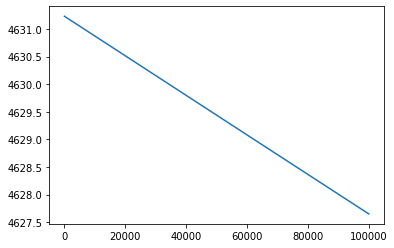

In [127]:
losses = []  # loss 값 기록할 리스트 생성

for i in range(1, 100001) :
    dW, db = gradient(X_train, W, b, y_train)
    W -= L_Rate * dW
    b -= L_Rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0 :
        print('Iteratiton %d : Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [129]:
# (10) 테스트 데이터에 대한 성능 확인
# cost function: MSE
'''
def MSE(y_true, y_pred) :
    cost = ((y_true - y_pred) ** 2)
    return cost.mean()

def loss(x, w, b, y) :
    predictions = model(x,w,b)
    L = MSE(predictions, y)
    return L
'''

prediction = model(X_test, W, b)
Loss = loss(X_test, W, b, y_test)
Loss

4030.5498579345804

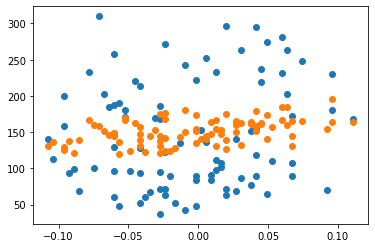

In [130]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()